In [1]:
# Binary Classification can be done using Logistic Regression. Its a Clasification Model

In [2]:
# Classification Algorithm based on Supervised Learning
# The model outputs the probability of a categorical target variable Y belonging to a certain class

In [3]:
# logistic regression is also a parametric method which means it makes an assumption about the form of the function relating X and Y


In [4]:
# in case of n features we need to learn n+1 weights same as the case of Regression

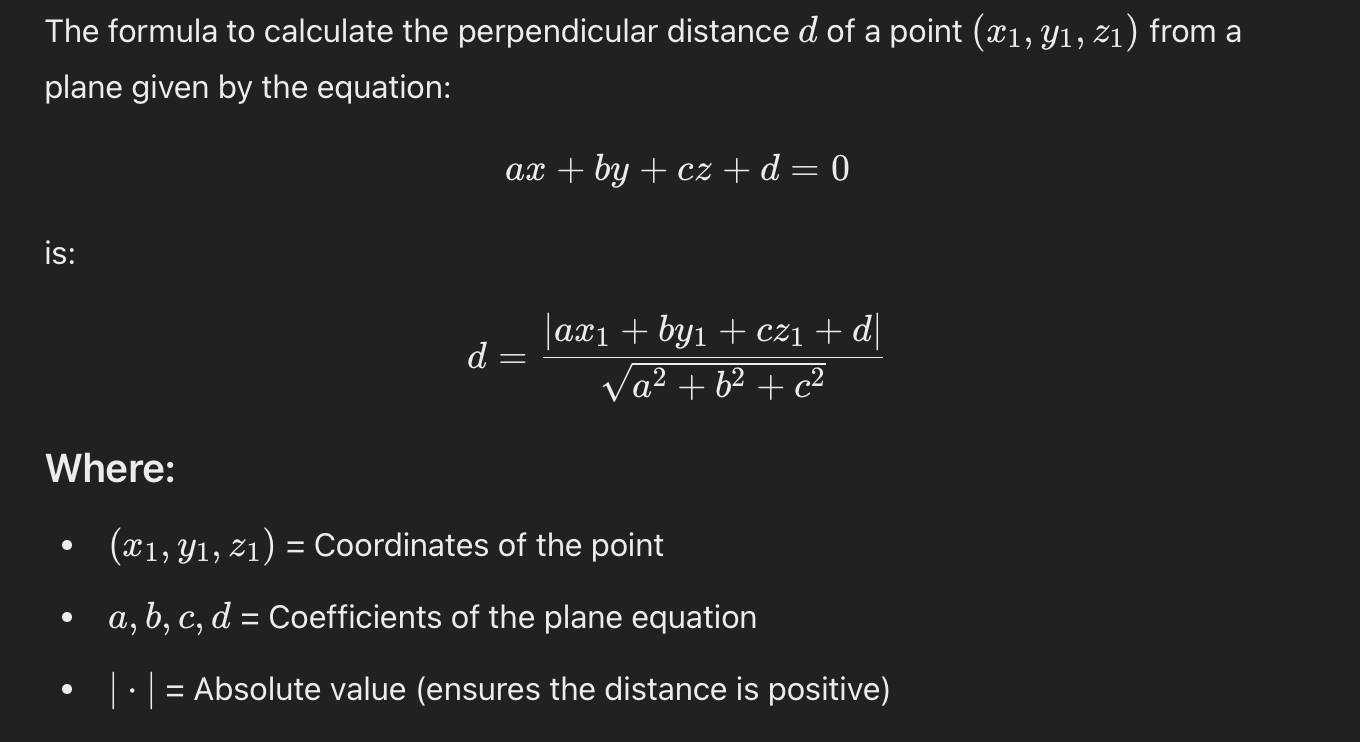

In [ ]:
# d = np.dot(theta.T,X) this distance could be in the range [-inf,inf]

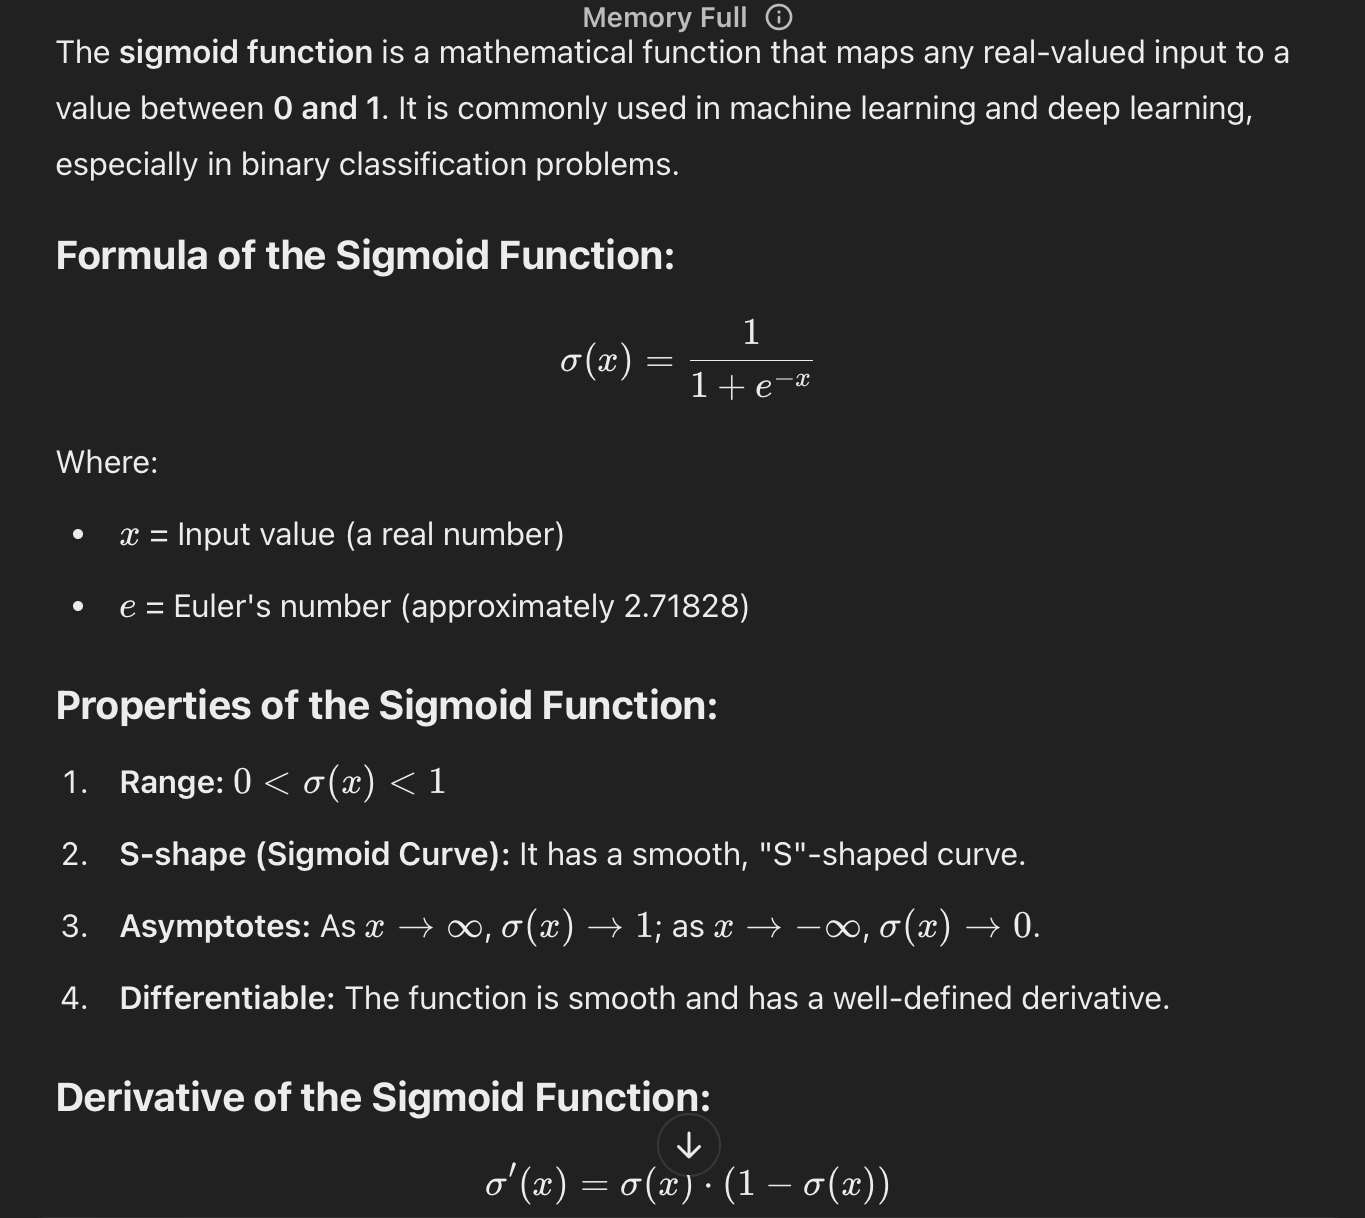

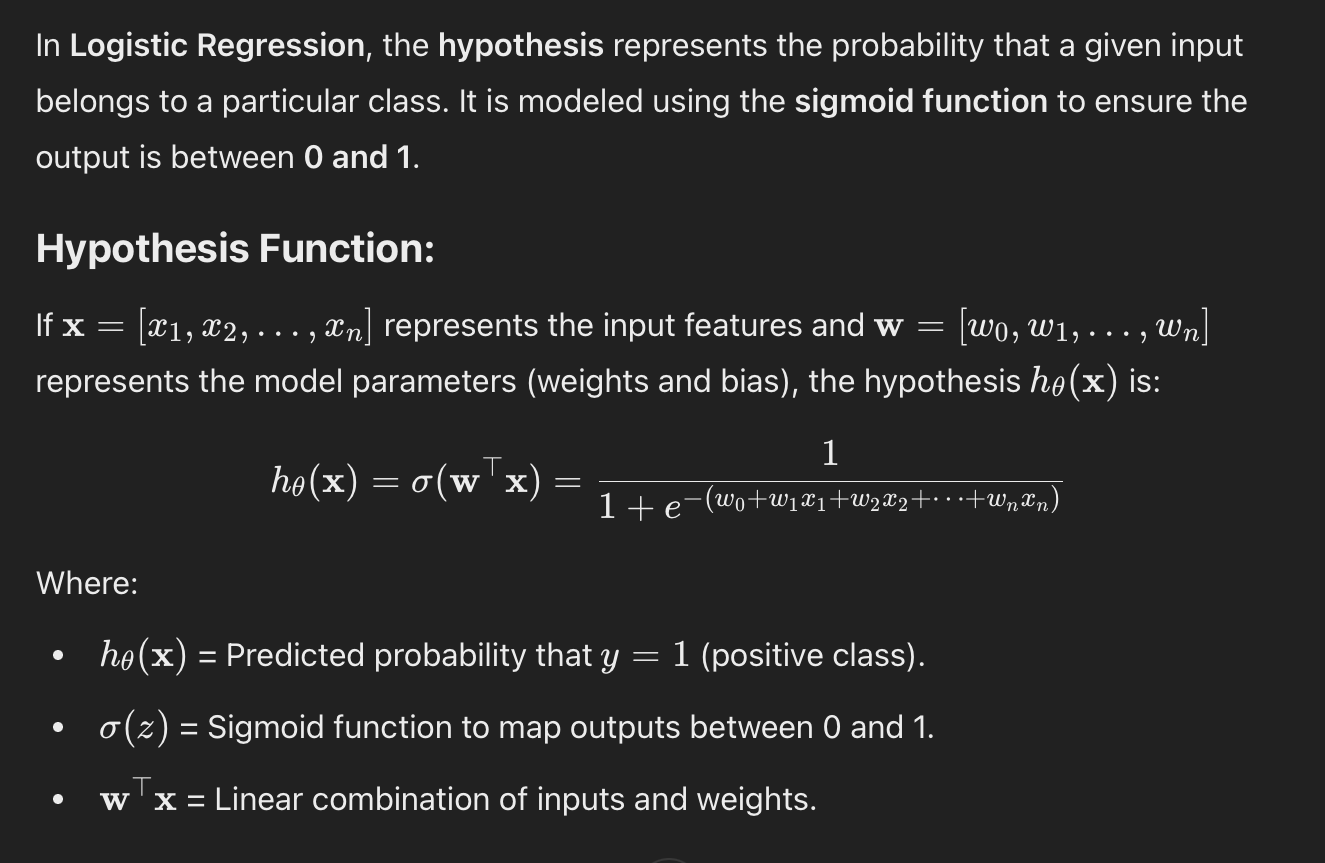

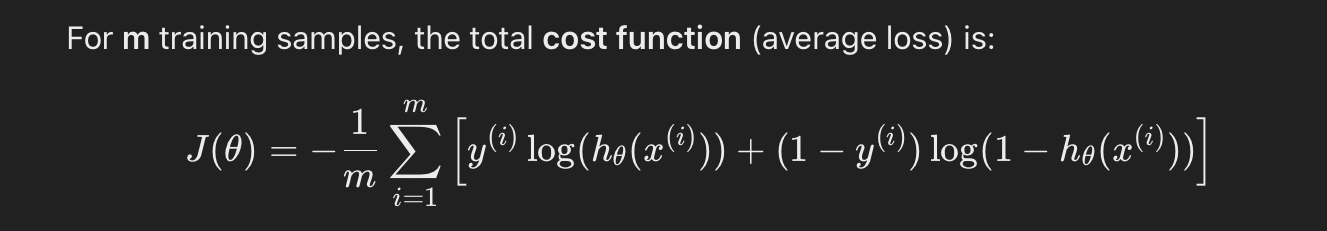

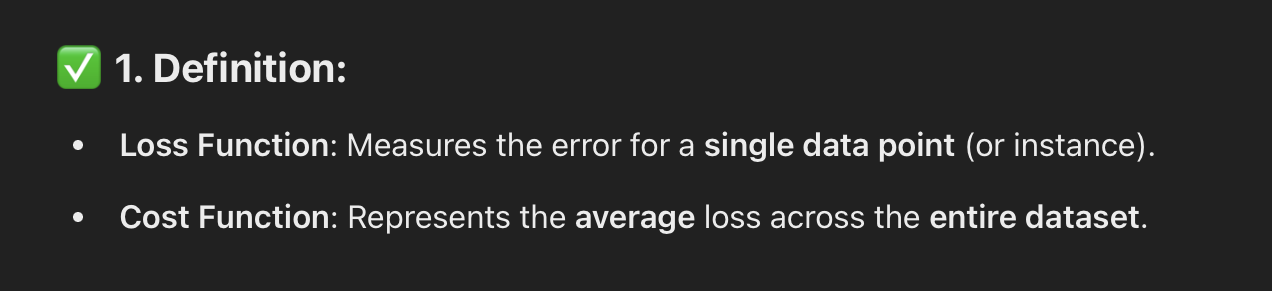

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_blobs

In [7]:
# Step 1 Generate some dumy dataset

In [18]:
X,y = make_blobs(n_samples = 2000 , n_features = 2 ,cluster_std = 3, centers = 2 , random_state = 42)

In [59]:
n_features = 2

In [19]:
print(X.shape , y.shape)

(2000, 2) (2000,)


In [20]:
# Step 2 Visualize the Dataset

In [21]:
def visualise(X,y):
    plt.scatter(X[:,0],X[:,1],c = y,cmap = 'rainbow')
    plt.grid()
    plt.show()
    

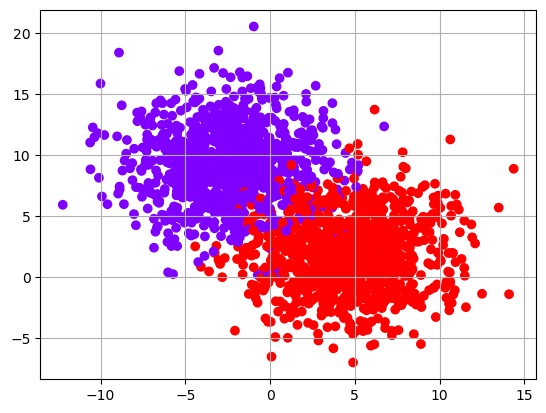

In [22]:
visualise(X,y)

In [25]:
def normalise(X):
    u = X.mean()
    sd = X.std()

    return (X-u)/sd

In [26]:
X = normalise(X)

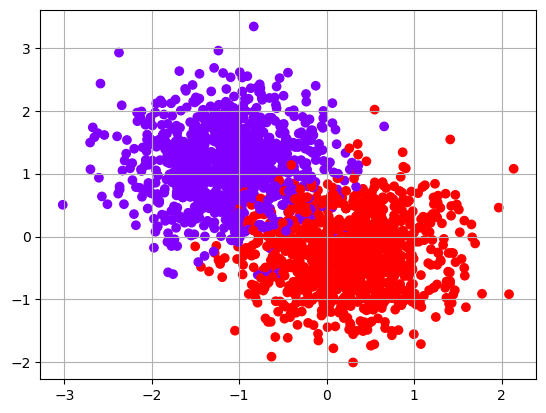

In [27]:
visualise(X,y)

In [28]:
# Step - 4 4Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
XT,Xt,yT,yt = train_test_split(X,y,test_size = 0.3 , shuffle = False , random_state = 42)

In [32]:
print(XT.shape,yT.shape)

(1400, 2) (1400,)


In [34]:
print(Xt.shape,yt.shape)

(600, 2) (600,)


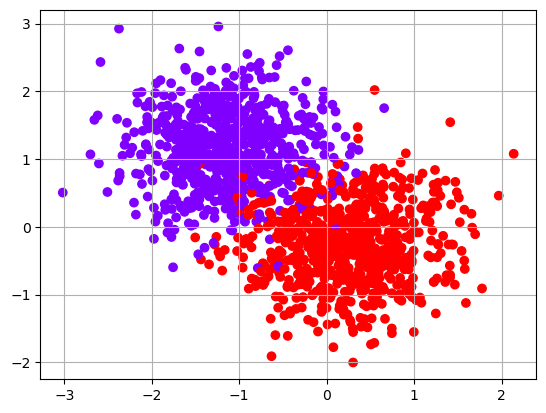

In [36]:
visualise(XT,yT)

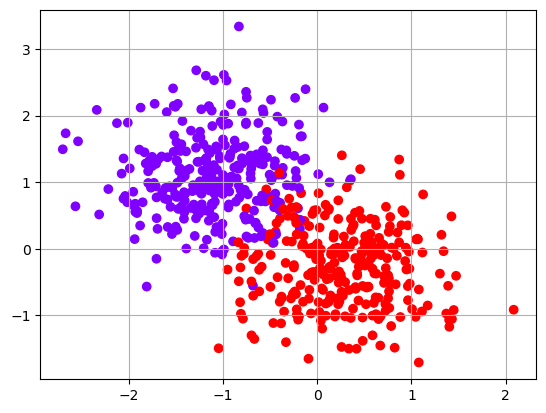

In [37]:
visualise(Xt,yt)

In [39]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [63]:
def preprocess(X):
    m = X.shape[0]
    if(n_features == m):
        ones = np.ones((m,1))
        X = np.hstack((ones,X))
    return X

In [64]:
XT = preprocess(XT)

In [65]:
Xt = preprocess(Xt)

In [66]:
def hypothesis(X,theta):
    return sigmoid(np.dot(theta,X))

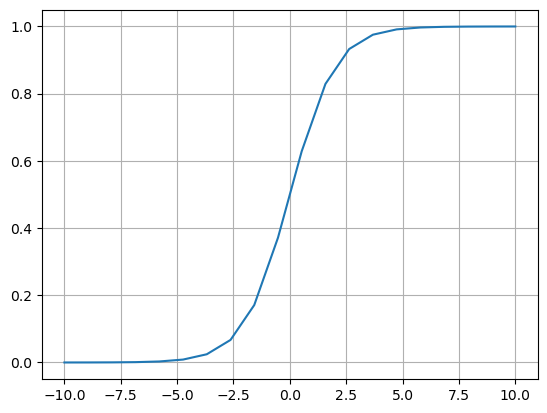

In [67]:
# visualising sigmoid
z = np.linspace(-10,10,20)

plt.plot(z,sigmoid(z))
plt.grid()
plt.show()

In [68]:
# Binary Cross Entropy
def error(y,yp):
    loss = -np.mean( y*np.log(yp) + (1-y)*np.log(1-yp))# the * here is a element wise multiplication
    return loss

In [69]:
def gradient(X,y,yp):
    m = X.shape[0]
    grad = -(1/m) * np.dot(X.T,(y-yp))
    return grad

In [80]:
def train(X,y,maxIters = 100, learning_rate = 0.1):
    # Randomly init theta
    theta = np.random.randn(n_features+1,1)

    error_list = []

    for i in range(maxIters):
        yp = hypothesis(XT,theta)
        e = error(y,yp)
        error_list.append(e)
        grad = gradient(X,y,yp)
        theta = theta - learning_rate*grad

    plt.plot(error_list)
    return theta
    
    
    

In [81]:
theta = train(Xt,yt,maxIters=100,learning_rate = 0.1)

ValueError: shapes (3,1) and (1400,3) not aligned: 1 (dim 1) != 1400 (dim 0)